In [74]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL

In [87]:
# Return new image


In [76]:
# Hàm đối chiếu hình ảnh trước và sau khi xử lý
def show_image(img_list):
    plt.figure(figsize=(20,10))
    [plt.subplot(1, len(img_list), i+1) and plt.imshow(img_list[i]) for i in range(len(img_list))]
    plt.show()

In [77]:
# Read image and return 1d array
def convert_1d_array(img_name):
    img_2d = np.array(Image.open(img_name))
    print(img_2d.shape)
    return np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), dtype='uint8', buffer=img_2d.astype('uint8'))

In [78]:
def initialize_centroids(img_1d, k_clusters, init_centroids):
    # centroids : np.ndarray with shape=(k_clusters, num_channels)
    unique_img_1d = np.unique(img_1d, axis=0)
    k_clusters = min(k_clusters, len(unique_img_1d))
    if init_centroids == 'random': # Random 
        centroids = np.random.randint(256, size=(k_clusters, img_1d.shape[1]), dtype='uint8')
    elif init_centroids == 'in_pixels':
        index_array = np.random.choice(unique_img_1d.shape[0], k_clusters, replace=False)
        centroids = [unique_img_1d[index_array[i]] for i in range(k_clusters)]
    else:
        raise ValueError('init_centroids must be "random" or "in_pixels"')
    return np.array(centroids)

In [79]:
def get_labels(img_1d, centroids):
    # labels : np.ndarray with shape=(img_1d.shape[0],)
    img_1d = img_1d.reshape(len(img_1d), 1, img_1d.shape[1]).astype('int64')
    centroids = centroids.reshape(1, len(centroids), centroids.shape[1]).astype('int64')
    
    return np.argmin(np.sum((img_1d - centroids) ** 2, axis=2), axis=1)

In [80]:
def update_centroids(img_1d, labels, k_clusters, centroids):
    centroids = [np.mean(img_1d[labels == i], axis=0).astype('uint8') for i in range(k_clusters)]
    return np.array(centroids)

In [81]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids):
    centroids = initialize_centroids(img_1d, k_clusters, init_centroids)
    for _ in range(max_iter):
        labels = get_labels(img_1d, centroids)
        centroids = update_centroids(img_1d, labels, k_clusters, centroids)
    return centroids, labels

In [82]:
def convert_2d_array(img_1d, img_2d, centroids, labels):
    new_img_1d = np.ndarray((labels.shape[0], centroids.shape[1]), 'uint8', np.array([centroids[l] for l in labels]))
    new_img_1d = np.array(new_img_1d)
    new_img_1d = np.ndarray((img_1d.shape[0], img_1d.shape[1]), 'uint8', new_img_1d)
    new_img_2d = np.reshape(new_img_1d, (img_2d.shape[0], img_2d.shape[1], img_2d.shape[2]))
    return new_img_2d

In [85]:
def main():
    img_name = input('Nhập đường dẫn ảnh: ')
    k_clusters = int(input('Nhập số lượng cụm: '))
    max_iter = int(input('Nhập số lần lặp: '))
    init_cluster = input('Nhập cách khởi tạo centroid (in_pixels hoặc random): ')
    
    img_2d = np.array(Image.open(img_name))
    img_1d =  np.ndarray((img_2d.shape[0] * img_2d.shape[1], img_2d.shape[2]), dtype='uint8', buffer=img_2d.astype('uint8'))
    centroids, labels = kmeans(img_1d, k_clusters, max_iter, init_cluster)
    
    # chuyển centroids, labels về dạng 2d
    new_img_2d = convert_2d_array(img_1d, img_2d, centroids, labels)
    
    img_list = [Image.fromarray(img_2d), Image.fromarray(new_img_2d)]
    show_image(img_list)
    
    

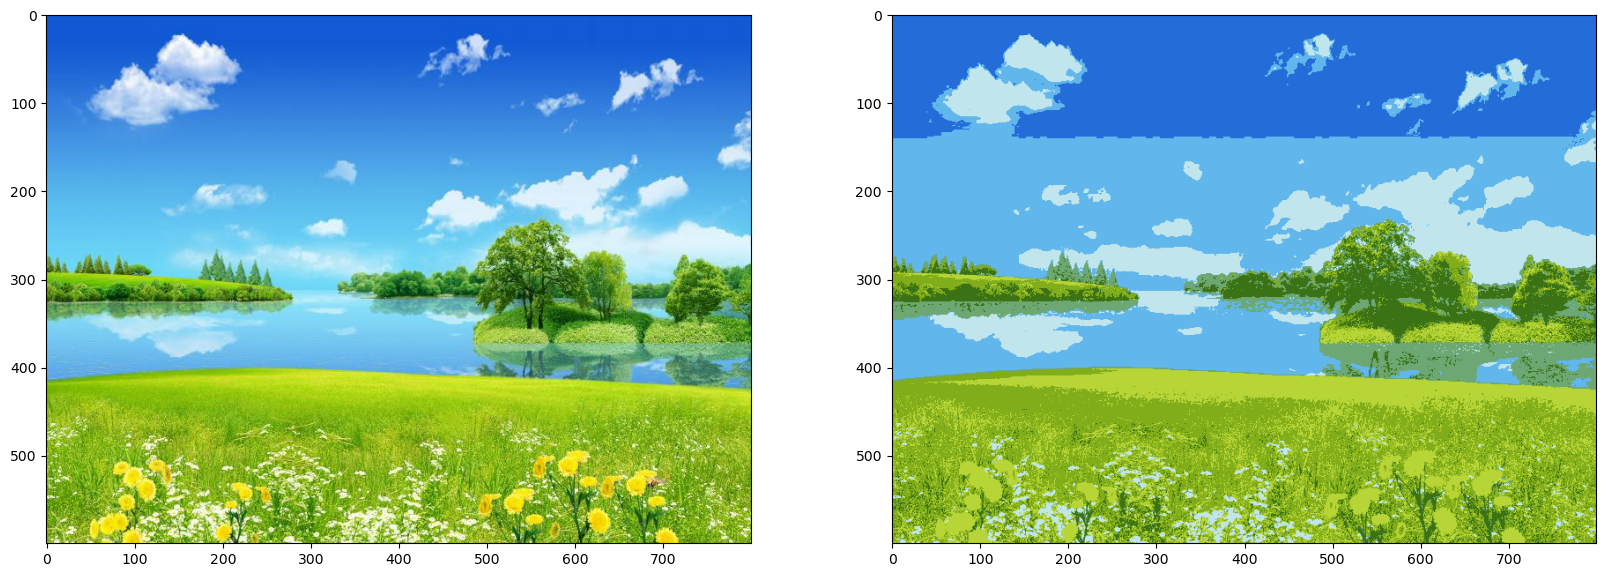

AttributeError: read

In [86]:
main()

# B1: Tìm k centroids
## Vấn đề: Random không lấy lại màu cũ
# B2: Tính khoảng cách từ k centroids đến các điểm dữ liệu
## Sự thay đổi của centroid là không đáng kể hoặc không nhiều hoặc max_iter

### Màu cuối cùng tìm được không nhất thiết phải có trong ảnh
### Mask numpy